In [1]:
# Importo las librerias 'pandas' y 'numpy'

import pandas as pd                      # pandas: librería para el análisis de datos
import numpy as np                       # numpy: librería especializada en el cálculo numérico y análisis de datos

# Importo las librerías y paquetes necesarios para llevar a cabo el clustering

import matplotlib.pyplot as plt          # matplotlib: Libreria para realizar gráficos
from sklearn.cluster import KMeans       # Importo la función 'Kmeans' del módulo 'cluster ' del paquete sklearn

# También voy a necesitar 'pandas' y 'numpy' pero ya fueron importadas al inicio del notebook

In [2]:
# Para realizar los radar charts de las jugadoras con caracteristicas similares a la que buscamos, necesitermos le paquete 'pygal'

import pygal

 Como el paquete 'pygal' no esta incluido en Anaconda, debo instalarlo para poder utilizarlo
 En el repositorio se encuentra el archivo 'pygal-2.4.0-py2.py3-none-any.whl' necesario para la instalación 

In [3]:
pip install pygal

Note: you may need to restart the kernel to use updated packages.


# Adquisición de los datos

In [4]:
# Cargo los archivos de los partidos mediante la instrucción '.read_csv' de Pandas
# Almaceno cada uno de los archivos en una variable

df1 = pd.read_excel ('23_06_2021_Bayer 04 Leverkusen_players.xlsx')
df2 = pd.read_excel ('23_06_2021_Bayern Munich_players.xlsx')
df3 = pd.read_excel ('23_06_2021_Eintracht Frankfurt_players.xlsx')
df4 = pd.read_excel ('23_06_2021_Freiburg_players.xlsx')
df5 = pd.read_excel ('23_06_2021_Hoffenheim_players.xlsx')
df6 = pd.read_excel ('23_06_2021_Meppen_players.xlsx')
df7 = pd.read_excel ('23_06_2021_MSV Duisburg_players.xlsx')
df8 = pd.read_excel ('23_06_2021_SC Sand_players.xlsx')
df9 = pd.read_excel ('23_06_2021_SGS Essen_players.xlsx')
df10 = pd.read_excel ('23_06_2021_Turbine Potsdam_players.xlsx')
df11 = pd.read_excel ('23_06_2021_Werder Bremen_players.xlsx')
df12 = pd.read_excel ('23_06_2021_Wolfsburg_players.xlsx')




In [5]:
df5.head()

,Unnamed: 0,Unnamed: 1,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
0,23,Jana Beuschlein,181,18,F,3,1,8,3,38%,...,Germany,Hoffenheim,-,25,173,-,Both,-,-,425
1,4,Michaela Specht,228,10,CD,-,-,-,-,-,...,Germany,Hoffenheim,-,24,168,-,Both,-,07.16,880
2,7,Chantal Hagel,199,19,CM,-,-,2,-,-,...,Germany,Hoffenheim,-,22,-,-,Both,-,-,1106
3,33,Fabienne Dongus,221,21,DM,2,1,6,3,50%,...,Germany,Hoffenheim,Germany,27,178,-,Both,06.21,08.13,1694
4,9,K. Naschenweng,215,21,LD,1,4,5,2,40%,...,Austria,Hoffenheim,Austria,23,167,-,Both,06.21,07.16,1759


# Concatenacion archivos

In [7]:
df = pd.concat ([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], sort = False)
df.head()

,Unnamed: 0,Unnamed: 1,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
0,16,Sofie Zdebel,162,4,DM,-,-,-,-,-,...,Germany,Bayer 04,-,16,-,-,Both,-,-,95
1,4,Sylwia Matysik,182,13,DM,-,-,2,-,-,...,Poland,Bayer 04,Poland,24,-,-,Both,06.21,09.14,1003
2,9,Chiara Bucher,176,7,CM,1,-,1,1,100%,...,Germany,Bayer 04,-,17,169,-,Both,-,-,141
3,31,Verena Wieder,178,9,LM,1,1,2,1,50%,...,Germany,Bayer 04,-,20,-,-,Right,-,10.18,355
4,18,Gianna Rackow,171,18,F,1,3,2,1,50%,...,Germany,Bayer 04,-,20,-,-,Both,-,09.17,459


# Cambio el nombre de las columnas.
Sustituyo nombre de columnas por otro mas apropiado del que tienen por defecto

In [8]:
df.rename (columns = {'Unnamed: 0': 'Index', 'Unnamed: 1':'Name'}, inplace = True)
df.head()

,Index,Name,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
0,16,Sofie Zdebel,162,4,DM,-,-,-,-,-,...,Germany,Bayer 04,-,16,-,-,Both,-,-,95
1,4,Sylwia Matysik,182,13,DM,-,-,2,-,-,...,Poland,Bayer 04,Poland,24,-,-,Both,06.21,09.14,1003
2,9,Chiara Bucher,176,7,CM,1,-,1,1,100%,...,Germany,Bayer 04,-,17,169,-,Both,-,-,141
3,31,Verena Wieder,178,9,LM,1,1,2,1,50%,...,Germany,Bayer 04,-,20,-,-,Right,-,10.18,355
4,18,Gianna Rackow,171,18,F,1,3,2,1,50%,...,Germany,Bayer 04,-,20,-,-,Both,-,09.17,459


# Eliminacion filas duplicadas

Es posible que se produzcan duplicados al concatenar archivos. Utilizo La columna 'NAME' para identificar duplicados y eliminar las filas repetidas

In [9]:
df.drop_duplicates ('Name', inplace = True)

# Transformacion columna 'Name' en indice

Sera mucho mas comodo que el indice de cada fila sea el nombre de la jugadora

In [10]:
# Transformo la columna 'Name' en el 'indice'

df.set_index ('Name', inplace = True)
df.head()

,Index,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",Сhances created,...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
Name,,,,,,,,,,,,,,,,,,,,,
Sofie Zdebel,16,162,4,DM,-,-,-,-,-,-,...,Germany,Bayer 04,-,16,-,-,Both,-,-,95
Sylwia Matysik,4,182,13,DM,-,-,2,-,-,-,...,Poland,Bayer 04,Poland,24,-,-,Both,06.21,09.14,1003
Chiara Bucher,9,176,7,CM,1,-,1,1,100%,-,...,Germany,Bayer 04,-,17,169,-,Both,-,-,141
Verena Wieder,31,178,9,LM,1,1,2,1,50%,3,...,Germany,Bayer 04,-,20,-,-,Right,-,10.18,355
Gianna Rackow,18,171,18,F,1,3,2,1,50%,4,...,Germany,Bayer 04,-,20,-,-,Both,-,09.17,459


# Reemplazo '-' por ceros


In [11]:
# Reemplazo '-' por ceros

df = df.replace ('-',0)
df

,Index,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",Сhances created,...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
Name,,,,,,,,,,,,,,,,,,,,,
Sofie Zdebel,16,162,4,DM,0,0,0,0,0,0,...,Germany,Bayer 04,0,16,0,0,Both,0,0,95
Sylwia Matysik,4,182,13,DM,0,0,2,0,0,0,...,Poland,Bayer 04,Poland,24,0,0,Both,06.21,09.14,1003
Chiara Bucher,9,176,7,CM,1,0,1,1,100%,0,...,Germany,Bayer 04,0,17,169,0,Both,0,0,141
Verena Wieder,31,178,9,LM,1,1,2,1,50%,3,...,Germany,Bayer 04,0,20,0,0,Right,0,10.18,355
Gianna Rackow,18,171,18,F,1,3,2,1,50%,4,...,Germany,Bayer 04,0,20,0,0,Both,0,09.17,459
Nina Bruggemann,23,189,14,CD,1,0,3,1,33%,2,...,Germany,Bayer 04,0,28,175,0,Both,0,0,1170
Viktoria Pinther,20,162,8,F,0,0,2,0,0,0,...,Austria,Bayer 04,0,22,0,0,Both,12.20,10.16,315
Ann-Kathrin Vinken,8,188,13,CD,0,0,0,0,0,0,...,Germany,Bayer 04,0,21,0,0,Both,0,0,718
Dora Zeller,19,197,22,LM,3,2,25,5,20%,20,...,Hungary,Bayer 04,0,26,166,0,Right,10.20,09.13,1725


# Eliminar los % de determinadas columnas para transformarlos en 'int' y poder trabajar con ellos

In [13]:
def no_percents (player_name,name_column):
     
     
    a = df.loc [player_name, name_column]
    
    if type (a) == str:
        b = a [:-1]
        result = int (b)
    else:
        result = a
      
    return result

no_percents ('Nina Bruggemann','Air challenges won, %')

63

## Minutos jugados

In [14]:
# Antes de normalizar los datos, debemos dividir las estad'isticas por los partidos jugados
# 1.Creo una fx que introduciendo nombre jugadora me devuelve los partidos jugados

def minutos_jugados (player_name):
    
    result = df.loc [player_name, 'Minutes played']
    return result

minutos_jugados ('Nina Bruggemann')

1170

# Partidos jugados

In [15]:
# Antes de normalizar los datos, debemos dividir las estad'isticas por los partidos jugados
# 1.Creo una fx que introduciendo nombre jugadora me devuelve los partidos jugados

def partidos_jugados (player_name):
    
    result = df.loc [player_name, 'Matches played']
    return result

partidos_jugados ('Nina Bruggemann')

14

# Partidos de 90 minutos disputados

In [16]:
# Dividimos el total de minutos jugados entre 90 para saber cuantos partidos de 90 minutos ha jugado

def partidos_90min (player_name):
    
    a = df.loc [player_name, 'Minutes played']
    result = a / 90
    return result

partidos_90min ('Nina Bruggemann')

13.0

## Equipo en el que juega

In [17]:
def where_she_plays (player_name):
    result = df.loc [player_name, 'Team']
    return result
where_she_plays ('Nina Bruggemann')

'Bayer 04'

## Posición jugadoras


In [18]:
def posicion (player_name):
    result = df.loc [player_name, 'Position']
    
    if result == 'CD':
        return 'Central defender' 
    if result == 'RD':
        return 'Right defender'
    if result == 'LD':
        return 'Left defender'
    
    if result == 'DM':
        return 'Defensive midfielder'
    if result == 'CM':
        return 'Central midfielder'
    if result == 'LM':
        return 'Left midfielder'
    if result == 'RM':
        return 'Right midfielder'
    
    if result == 'F':
        return 'Forward'
    
    return result    

In [19]:
posicion ('Nina Bruggemann')

'Central defender'

# Nationality

In [20]:
def nationality (player_name):
    result = df.loc [player_name, 'Nationality']
    return result
nationality ('Nina Bruggemann')

'Germany'

# National team

In [21]:
def national_team (player_name):
    result = df.loc [player_name, 'National team ']
    return result
national_team ('Nina Bruggemann')

0

# Foot

In [22]:
def foot (player_name):
    result = df.loc [player_name, 'Foot']
    return result
foot ('Nina Bruggemann')    

'Both'

# Age

In [23]:
def age (player_name):
    result = df.loc [player_name, 'Age']
    return result
age ('Nina Bruggemann')  

28

# Height

In [24]:
def height (player_name):
    result = df.loc [player_name, 'Height']
    return result
height ('Nina Bruggemann')  

175

# Weight

In [25]:
def weight (player_name):
    result = df.loc [player_name, 'Weight']
    return result
weight ('Nina Bruggemann')  

0

# Elimino las columnas de datos que no voy a normalizar

In [26]:
Liga = df.drop (['Matches played','Minutes played','Index','InStat Index','Position', 'Chances, % of conversion', 'Accurate passes, %', 'Accurate crosses, %','Challenges won, %', 'Challenges in defence won, %','Challenges in attack won, %','Successful dribbles, %','Tackles won, %','Nationality','Team','National team ','Team','Foot','National team (last match date, mm.yy)','Youth national team (last match date, mm.yy)','Air challenges won, %','Age','Height','Weight','xG (Expected goals)'], axis = 1)
Liga

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Ball recoveries,Ball recoveries in opponent's half,Challenges,Defensive challenges,Attacking challenges,Air challenges,Dribbles,Tackles,Ball interceptions,Free ball pick ups
Name,,,,,,,,,,,,,,,,,,,,,
Sofie Zdebel,0,0,0,0,0,1,0,0,0,0,...,6,3,21,10,11,5,3,3,6,6
Sylwia Matysik,0,0,2,0,0,25,15,1,0,0,...,71,24,223,134,89,50,15,59,61,95
Chiara Bucher,1,0,1,1,0,2,0,0,0,1,...,5,1,38,12,26,2,8,4,8,4
Verena Wieder,1,1,2,1,3,1,4,0,0,3,...,16,8,78,16,62,15,18,8,9,17
Gianna Rackow,1,3,2,1,4,4,3,0,0,2,...,18,9,92,28,64,25,14,13,16,26
Nina Bruggemann,1,0,3,1,2,8,9,2,0,0,...,115,11,179,134,45,59,5,24,90,128
Viktoria Pinther,0,0,2,0,0,4,0,0,0,4,...,6,4,72,16,56,24,8,5,6,8
Ann-Kathrin Vinken,0,0,0,0,0,5,6,0,0,0,...,72,7,127,100,27,45,8,22,79,68
Dora Zeller,3,2,25,5,20,33,27,3,0,11,...,81,43,461,185,276,74,119,75,78,105


## Dividir los datos entre el numero de partidos jugados

In [27]:
# 1. Obtengo la fila de datos de la jugadora en cuestion
grouped = Liga.groupby('Name')
Nina = grouped.get_group('Nina Bruggemann')
Nina

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Ball recoveries,Ball recoveries in opponent's half,Challenges,Defensive challenges,Attacking challenges,Air challenges,Dribbles,Tackles,Ball interceptions,Free ball pick ups
Name,,,,,,,,,,,,,,,,,,,,,
Nina Bruggemann,1,0,3,1,2,8,9,2,0,0,...,115,11,179,134,45,59,5,24,90,128


In [28]:
# 2.Llamo a la variable 'partidos_jugados' para ver el numero de partidos disputados por la jugadora en cuestion

partidos_90min ('Nina Bruggemann')
                


13.0

In [27]:
# 3. Divido las estadisticas por el numero de partidos jugados 

Alexia /  partidos_90min ('Alexia Putellas')

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Ball recoveries,Ball recoveries in opponent's half,Challenges,Defensive challenges,Attacking challenges,Air challenges,Dribbles,Tackles,Ball interceptions,Free ball pick ups
Name,,,,,,,,,,,,,,,,,,,,,
Alexia Putellas,0.694406,0.421604,2.20722,0.719206,1.959217,1.14081,1.835216,0.0248,0.0,0.198402,...,3.794434,2.306421,19.691375,6.150455,13.54092,3.37283,6.100854,3.050427,3.744833,5.778451


# Funcion Statsplayer

In [31]:
# Junto todos los pasos anteriores para crear la fx 'Stats_player'
# En ella, introducimos el nombre de una jugadora y nos devuelve sus estadisticas/ partido

def Stats_player (name_player):
    
    grouped = Liga.groupby('Name')
    a = grouped.get_group(name_player)
    a = a / partidos_90min (name_player)
    a ['Team'] = [where_she_plays (name_player)]
    a ['Position'] = [posicion (name_player)]
    a ['Matches played'] = [partidos_jugados (name_player)]
    a ['Matches 90 min'] = [partidos_90min (name_player)]
    a ['minutos_jugados'] = [minutos_jugados (name_player)]
    a ['Nationality'] = [nationality (name_player)]
    a ['National_team'] = [national_team (name_player)]
    a ['Foot'] = [foot (name_player)]
    a ['Age'] = [age (name_player)]
    a ['Height'] = [height (name_player)]
    a ['Weight'] = [weight (name_player)]
    a ['Chances, % of conversion'] = [no_percents ((name_player),'Chances, % of conversion')]
    a ['Accurate crosses, %'] = [no_percents ((name_player),'Accurate crosses, %')]
    a ['Challenges won, %'] = [no_percents ((name_player),'Challenges won, %')]
    a ['Challenges in defence won, %'] = [no_percents ((name_player),'Challenges in defence won, %')]
    a ['Challenges in attack won, %'] = [no_percents ((name_player),'Challenges in attack won, %')]
    a ['Air challenges won, %'] = [no_percents ((name_player),'Air challenges won, %')]
    a ['Successful dribbles, %'] = [no_percents ((name_player),'Successful dribbles, %')]
    a ['Tackles won, %'] = [no_percents ((name_player),'Tackles won, %')]
    a ['Accurate passes, %'] = [no_percents ((name_player),'Accurate passes, %')]
    a ['xG (Expected goals)'] = [no_percents ((name_player),'xG (Expected goals)')]
            
    return a

Stats_player ('Nina Bruggemann')    

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
Nina Bruggemann,0.076923,0.0,0.230769,0.076923,0.153846,0.615385,0.692308,0.153846,0.0,0.0,...,33,0,64,62,69,63,100,54,81,1.74


In [32]:
Stats_player ('Gianna Rackow') 

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
Gianna Rackow,0.196078,0.588235,0.392157,0.196078,0.784314,0.784314,0.588235,0.0,0.0,0.392157,...,50,0,41,43,41,40,43,38,62,0.79


# Lista todas las jugadoras del equipo


In [33]:
# Creamos una lista que guarde los nombres de todas las jugadoras para crear una tabla con las estadisticas de todas ellas
# Pasaremos esta lista a la fx Statsplayers

lista_filas = df.index
lista_filas

Index(['Sofie Zdebel', 'Sylwia Matysik', 'Chiara Bucher', 'Verena Wieder',
       'Gianna Rackow', 'Nina Bruggemann', 'Viktoria Pinther',
       'Ann-Kathrin Vinken', 'Dora Zeller', 'Lilla Turanyi',
       ...
       'Dominique Bloodworth', 'Sara Doorsoun-Khajeh', 'R. Blomqvist',
       'D. Janssen', 'Ewa Pajor', 'Felicitas Rauch', 'Lena Sophie Oberdorf',
       'J. Wedemeyer', 'Lara Joy Dickenmann', 'S. van de Sanden'],
      dtype='object', name='Name', length=271)

In [34]:
def stats_season (lista_filas):
    
    tabla = Stats_player ('Nina Bruggemann')  
    
    for k in (lista_filas):
        
        if k != 'Nina Bruggemann':
            grouped = Liga.groupby('Name')
            a = grouped.get_group(k)
            a = a / partidos_90min (k)
            a ['Team'] = [where_she_plays (k)]
            a ['Position'] = [posicion (k)]
            a ['Matches played'] = [partidos_jugados (k)]
            a ['Matches 90 min'] = [partidos_90min (k)]
            a ['minutos_jugados'] = [minutos_jugados (k)]
            a ['Nationality'] = [nationality (k)]
            a ['National_team'] = [national_team (k)]
            a ['Foot'] = [foot (k)]
            a ['Age'] = [age (k)]
            a ['Height'] = [height (k)]
            a ['Weight'] = [weight (k)]
            a ['Chances, % of conversion'] = [no_percents ((k),'Chances, % of conversion')]
            a ['Accurate crosses, %'] = [no_percents ((k),'Accurate crosses, %')]
            a ['Challenges won, %'] = [no_percents ((k),'Challenges won, %')]
            a ['Challenges in defence won, %'] = [no_percents ((k),'Challenges in defence won, %')]
            a ['Challenges in attack won, %'] = [no_percents ((k),'Challenges in attack won, %')]
            a ['Air challenges won, %'] = [no_percents ((k),'Air challenges won, %')]
            a ['Successful dribbles, %'] = [no_percents ((k),'Successful dribbles, %')]
            a ['Tackles won, %'] = [no_percents ((k),'Tackles won, %')]
            a ['Accurate passes, %'] = [no_percents ((k),'Accurate passes, %')]
            a ['xG (Expected goals)'] = [no_percents ((k),'xG (Expected goals)')]
           
            
    

        tabla = tabla.append(a, ignore_index = False)
        
    
    return tabla



In [35]:
lista_filas.tolist()  

['Sofie Zdebel',
 'Sylwia Matysik',
 'Chiara Bucher',
 'Verena Wieder',
 'Gianna Rackow',
 'Nina Bruggemann',
 'Viktoria Pinther',
 'Ann-Kathrin Vinken',
 'Dora Zeller',
 'Lilla Turanyi',
 'Jessica Wich',
 'Frederike Kempe',
 'Kristin Kogel',
 'Melissa Friedrich',
 'Sandra Maria Jessen',
 'Lara Katinka Marti',
 'Henrike Sahlmann',
 'Barbara Reger',
 'Milena Nikolic',
 'Henrietta Csiszar',
 'Isabel Kerschowski',
 'P. Machtens',
 'Juliane Wirtz',
 'Mina Tanaka',
 'Ivana Rudelic',
 'Kristin Demann',
 'K. Vilhjálmsdóttir',
 'Lina Maria Magull',
 'Laura Donhauser',
 'S. Laudehr',
 'Amanda Ilestedt',
 'Klara Buhl',
 'Gia Corley',
 'H. Glas',
 'Lineth Beerensteyn',
 'Cinzia Zehnder',
 'Giulia Ronja Gwinn',
 'Sarah Zadrazil',
 'Carina Wenninger',
 'Julia Pollak',
 'Sydney Lohmann',
 'Marina Hegering',
 'Lea Schuller',
 'Linda Dallmann',
 'Carolin Simon',
 'Viviane Asseyi',
 'Simone Boye Sorensen',
 'Geraldine Reuteler',
 'Camilla Kuver',
 'Sophia Kleinherne',
 'A. Jóhannsdóttir',
 'Saskia Math

In [36]:
tabla = stats_season (lista_filas)    
tabla                                 

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
Nina Bruggemann,0.076923,0.000000,0.230769,0.076923,0.153846,0.615385,0.692308,0.153846,0.0,0.000000,...,33,0,64,62,69,63,100,54,81,1.74
Sofie Zdebel,0.000000,0.000000,0.000000,0.000000,0.000000,0.947368,0.000000,0.000000,0.0,0.000000,...,0,0,43,40,45,60,67,67,66,0.00
Sylwia Matysik,0.000000,0.000000,0.179462,0.000000,0.000000,2.243270,1.345962,0.089731,0.0,0.000000,...,0,50,53,54,51,46,27,54,74,0.60
Chiara Bucher,0.638298,0.000000,0.638298,0.638298,0.000000,1.276596,0.000000,0.000000,0.0,0.638298,...,100,0,39,50,35,0,38,75,56,0.12
Verena Wieder,0.253521,0.253521,0.507042,0.253521,0.760563,0.253521,1.014085,0.000000,0.0,0.760563,...,50,0,42,88,31,47,33,88,69,0.39
Gianna Rackow,0.196078,0.588235,0.392157,0.196078,0.784314,0.784314,0.588235,0.000000,0.0,0.392157,...,50,0,41,43,41,40,43,38,62,0.79
Gianna Rackow,0.196078,0.588235,0.392157,0.196078,0.784314,0.784314,0.588235,0.000000,0.0,0.392157,...,50,0,41,43,41,40,43,38,62,0.79
Viktoria Pinther,0.000000,0.000000,0.571429,0.000000,0.000000,1.142857,0.000000,0.000000,0.0,1.142857,...,0,0,29,25,30,29,38,60,68,0.72
Ann-Kathrin Vinken,0.000000,0.000000,0.000000,0.000000,0.000000,0.626741,0.752089,0.000000,0.0,0.000000,...,0,100,57,58,52,67,38,36,85,0.00


# Creo una tabla a partir de la cual relizaremos los radar Charts

In [37]:
tabla.to_excel('Bundesliga_Stats_90.xlsx')             

# Filtro 

In [35]:
filtro_equipo = tabla.groupby('Team')

In [37]:
Depor = filtro_equipo.get_group('Deportivo')
Depor

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Weight,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %"
Name,,,,,,,,,,,,,,,,,,,,,
Alba Merino Sanchez,0.280156,0.070039,0.700389,0.280156,0.595331,1.435798,1.961089,0.280156,0.000000,0.070039,...,52,40,24,49,55,43,45,49,59,66
María Figueroa,0.000000,0.000000,0.743802,0.000000,0.743802,2.975207,0.000000,0.743802,0.000000,0.000000,...,0,0,0,62,56,75,50,0,67,76
Tatiana Blanco,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,67,100,50,0,100,100,57
Noelia Villegas Rico,0.000000,0.036855,0.000000,0.000000,0.184275,0.626536,0.221130,0.073710,0.036855,0.073710,...,58,0,62,58,57,63,62,55,60,71
Cristina Martínez,0.000000,0.034169,0.136674,0.000000,0.205011,1.127563,0.649203,0.068337,0.000000,0.068337,...,0,0,19,47,52,38,35,36,51,70
Helena Torres,0.000000,0.000000,0.584416,0.000000,0.584416,1.461039,1.168831,0.292208,0.000000,0.000000,...,0,0,33,38,59,32,23,55,88,72
Iris Arnaiz Gil,0.000000,0.000000,0.033570,0.000000,0.067139,0.604252,0.469974,0.134278,0.000000,0.000000,...,0,0,0,63,61,70,58,75,62,76
Ainize Barea Nunez,0.346154,0.115385,0.923077,0.346154,0.615385,0.269231,1.500000,0.038462,0.000000,0.384615,...,53,38,25,33,29,34,27,53,38,74
Rosalía Muiño,0.000000,0.498615,0.000000,0.000000,0.498615,0.498615,2.991690,0.000000,0.000000,0.249307,...,0,0,0,35,33,36,35,38,46,66


In [38]:
Depor.to_excel('Stats90Depor.xlsx')

In [98]:
logrono = filtro_equipo.get_group('Logrono')
logrono

,Air challenges,Assists,Attacking challenges,Ball interceptions,Ball recoveries,Ball recoveries in opponent's half,Challenges,Chances,Chances successful,Crosses,...,Weight,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %"
Name,,,,,,,,,,,,,,,,,,,,,
Chini,2.600000,0.166667,6.800000,4.966667,5.366667,2.300000,14.100000,0.233333,0.000000,0.300000,...,53,0,22,46,44,48,36,60,48,78
R. Elloh,2.931034,0.103448,15.551724,1.758621,1.896552,0.896552,20.482759,0.448276,0.137931,1.413793,...,0,31,20,40,43,40,39,48,54,59
Marta Cazalla Garcia,3.720000,0.000000,1.720000,8.240000,8.240000,0.480000,10.520000,0.120000,0.000000,0.160000,...,67,0,25,67,67,67,69,55,53,76
Grace Asantewaa,2.565217,0.000000,8.826087,2.652174,3.565217,1.217391,15.739130,0.304348,0.130435,0.304348,...,0,43,0,50,50,51,47,63,47,71
Valeria Pascuet,0.500000,0.000000,2.200000,1.000000,1.000000,0.500000,4.800000,0.100000,0.100000,0.200000,...,0,100,0,46,38,55,60,67,41,64
Jade Boho,5.360000,0.240000,14.320000,1.880000,1.200000,0.600000,17.960000,0.680000,0.280000,2.720000,...,65,41,29,40,36,41,41,53,45,66
D. Caracas,1.826087,0.043478,5.000000,4.782609,4.347826,0.782609,14.565217,0.000000,0.000000,1.652174,...,0,0,16,57,60,53,43,55,64,72
Olga Garcia Perez,2.900000,0.000000,10.100000,2.300000,1.600000,0.400000,15.000000,0.600000,0.100000,0.400000,...,64,17,50,37,35,39,28,53,38,72
Lova Lundin,5.500000,0.000000,12.666667,0.666667,0.500000,0.166667,15.666667,0.833333,0.166667,0.500000,...,0,20,67,26,11,29,36,14,17,64


In [49]:
logrono.to_excel('logrono.xlsx')

In [52]:
logrono.loc['Chini',"Dribbles"]

1.8275862068965518

# Perfil jugadoras 

In [46]:
def perfil_jugadora (name_player):
    
    result = pd. Series (([posicion (name_player)],[partidos_jugados (name_player)]), index = ['Position','Matches played'])
    return result 
                         
perfil_jugadora ('Alexia Putellas')                         

Position          [Central midfielder]
Matches played                    [33]
dtype: object

In [ ]:
def perfil_jugadora (name_player):
    
    result = pd.DataFrame (([posicion (name_player)],[partidos_jugados (name_player)]), index = ['Position','Matches played'])
    return result 
                         
perfil_jugadora ('Alexia Putellas')                         

In [ ]:
    a ['Team'] = [where_she_plays (name_player)]
    a ['Position'] = [posicion (name_player)]
    a ['Matches played'] = [partidos_jugados (name_player)]
    a ['Nationality'] = [nationality (name_player)]
    a ['National_team'] = [national_team (name_player)]
    a ['Foot'] = [foot (name_player)]
    a ['Age'] = [age (name_player)]
    a ['Height'] = [height (name_player)]
    a ['Weight'] = [weight (name_player)]

In [165]:
def perfil (name_player):
    data = {'a': [[[name_player],[where_she_plays (name_player)],[posicion (name_player)] , [partidos_jugados (name_player)] , 
                     [nationality (name_player)], [national_team (name_player)],[foot (name_player)] , [age (name_player)],
                    [height (name_player)],[weight (name_player)]],'b':[1,2,3,4,5,6,7,8,9]}
    df = pd.DataFrame (data)
    return df
perfil ('Alexia Putellas')

SyntaxError: invalid syntax (<ipython-input-165-edf3bfb1bdd2>, line 4)

In [167]:
# BUENAAAAAA

def perfil_jugadora (name_player):
    
    data = {'': [[name_player],[where_she_plays (name_player)],[posicion (name_player)] , [partidos_jugados (name_player)] , 
                 [nationality (name_player)], [national_team (name_player)],[foot (name_player)] , [age (name_player)],
                [height (name_player)],[weight (name_player)]]}
    
    df = pd.DataFrame(data, index = ['Name player','Team','Position','Matches played','Nationality','National team','Foot',
                                    'Age','Height','Weight']
    df
      

SyntaxError: invalid syntax (<ipython-input-167-032081228674>, line 11)

In [ ]:
pd.DataFrame(np.arange(10.).reshape 10,1),
             index = 

In [108]:
perfil_jugadora ('Alexia Putellas')  

,
1,[Alexia Putellas]
2,[Barcelona]
3,[Central midfielder]
4,[33]
5,[Spain]
6,[Spain]
7,[Left]
8,[27]
9,[173.0]
10,[67.0]


In [2]:
df = pd.DataFrame(data, index = np.arange(1, 8))
df

NameError: name 'pd' is not defined

In [42]:
partidos_jugados ('Chini')

29

In [41]:
where_she_plays ('Chini')

'Logrono'

In [40]:
posicion ('Chini')

'Central midfielder'

In [72]:
# Normalizamos los datos de la tabla con las estad'iticas de todas las jugadoras

df_normalizado_radar = (tabla_radar - tabla_radar.min()) / (tabla_radar.max() - tabla_radar.min())
df_normalizado_radar.head()

NameError: name 'tabla_radar' is not defined

In [31]:
df_normalizado.fillna('0')

NameError: name 'df_normalizado' is not defined

# Radar charts

In [69]:
# Es necesario decidir que caracteristicas del juego son necesarias para las distintas demarcaciones
# Para ello vamos a una lista con los tipos de caract. del juego

index_columns = df3.columns                      # Obtengo una lista con las etiquetas de las columnas
lista_nombres_columnas = list(index_columns)          # Almaceno en una variable dicha lista con los nombres de las columnas.
lista_nombres_columnas

['Air challenges',
 'Assists',
 'Attacking challenges',
 'Ball interceptions',
 'Ball recoveries',
 "Ball recoveries in opponent's half",
 'Challenges',
 'Chances',
 'Chances successful',
 'Crosses',
 'Defensive challenges',
 'Dribbles',
 'Fouls',
 'Fouls suffered',
 'Free ball pick ups',
 'Goals',
 'Key passes',
 'Lost balls',
 'Lost balls in own half',
 'Offsides',
 'Passes',
 'Red cards',
 'Shots',
 'Shots on target',
 'Tackles',
 'Yellow cards',
 'xG (Expected goals)',
 'Сhances created']

In [70]:
# Tengo que hacer pasos anteriores como juntar todas las filas de cada jugadora en una unica tabla y normalizar los datos

def radar_chart (name_player):
    

    features = ['Goals','Dribbles','Chances','Chances successful','Сhances created','Shots','Shots on target','Attacking challenges']
    features_data = [df_normalizado.loc [name_player,'Goals'],df_normalizado.loc [name_player,'Assists'],
                     df_normalizado.loc [name_player,'Chances'], df_normalizado.loc [name_player,'Chances successful'],
                     df_normalizado.loc [name_player,'Сhances created'], df_normalizado.loc [name_player,'Fouls'],
                     df_normalizado.loc [name_player,'Fouls suffered'],df_normalizado.loc [name_player,'Attacking challenges']]
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

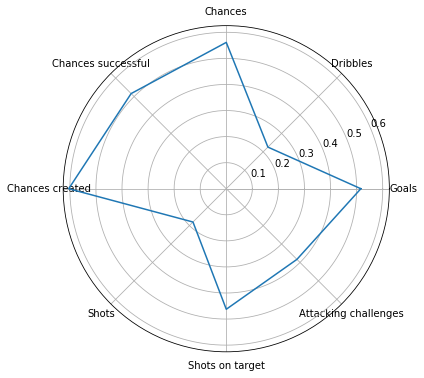

In [71]:
radar_chart ('Alexia Putellas')

In [117]:
radar_chart ('Angela Sosa Martin')

NameError: name 'radar_chart' is not defined

In [49]:
radar_chart ('Jenifer Hermoso')

NameError: name 'radar_chart' is not defined

In [137]:
posicion ('Ane Campos')

'Forward'

In [138]:
partidos_jugados ('Ane Campos')

11